## VC_1_Lab_02_SKImage - https://scikit-image.org/

### Visão Computacional 1

### Prof: José Humberto Cruvinel

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) devendo o aluno carregar as imagens contidas no link abaixo para uma pasta chamada **VC_1/processamento_imagens/** dentro do seu Google Drive

Execute a célula abaixo para montar seu Google Drive:


In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Execute esta linha para conferir que seu Google Drive está devidamente montado (deve aparecer a pasta 'drive')

%ls -la

total 3025
-rw------- 1 root root   60576 Feb  6  2018 BebasNeue-Regular.ttf
-rw------- 1 root root   72153 Oct 10 19:09 exercicio_3.jpg
-rw------- 1 root root   56289 Oct 10 19:40 Imagem1_cinza.jpg
-rw------- 1 root root    5916 Oct 10 19:40 Imagem1_cortada.jpg
-rw------- 1 root root   93503 Sep 29 02:37 Imagem1.jpg
-rw------- 1 root root   56289 Oct 11 12:08 Imagem1_skimage.jpg
-rw------- 1 root root   13967 Sep 29 03:45 Imagem2.jpg
-rw------- 1 root root   12656 Oct 11 12:11 imagem_com_ruido.jpeg
-rw------- 1 root root   14241 Oct 10 19:40 Imagem_ex_1_1.jpg
-rw------- 1 root root   44789 Oct 10 19:40 Imagem_ex_1_2.jpg
-rw------- 1 root root   18060 Oct 10 19:43 Imagem_ex_1_3.jpg
-rw------- 1 root root   12704 Oct 11 13:00 Imagem_ex_2_1.jpg
-rw------- 1 root root   43632 May 15  2012 Pacifico.ttf
-rw------- 1 root root  229239 Oct  6 03:11 robot.jpg
-rw------- 1 root root  753291 Oct  6 03:13 skate.jpg
-rw------- 1 root root 1606428 Oct  6 19:19 street.jpg


In [99]:
# Entrando no diretório

%cd /content/drive/My Drive/Colab Notebooks/Laboratório/processamento_imagens/

/content/drive/My Drive/Colab Notebooks/Laboratório/processamento_imagens


In [100]:
# Listando o conteúdo

%ls -la

total 3025
-rw------- 1 root root   60576 Feb  6  2018 BebasNeue-Regular.ttf
-rw------- 1 root root   72153 Oct 10 19:09 exercicio_3.jpg
-rw------- 1 root root   56289 Oct 10 19:40 Imagem1_cinza.jpg
-rw------- 1 root root    5916 Oct 10 19:40 Imagem1_cortada.jpg
-rw------- 1 root root   93503 Sep 29 02:37 Imagem1.jpg
-rw------- 1 root root   56289 Oct 11 12:08 Imagem1_skimage.jpg
-rw------- 1 root root   13967 Sep 29 03:45 Imagem2.jpg
-rw------- 1 root root   12656 Oct 11 12:11 imagem_com_ruido.jpeg
-rw------- 1 root root   14241 Oct 10 19:40 Imagem_ex_1_1.jpg
-rw------- 1 root root   44789 Oct 10 19:40 Imagem_ex_1_2.jpg
-rw------- 1 root root   18060 Oct 10 19:43 Imagem_ex_1_3.jpg
-rw------- 1 root root   12704 Oct 11 13:00 Imagem_ex_2_1.jpg
-rw------- 1 root root   43632 May 15  2012 Pacifico.ttf
-rw------- 1 root root  229239 Oct  6 03:11 robot.jpg
-rw------- 1 root root  753291 Oct  6 03:13 skate.jpg
-rw------- 1 root root 1606428 Oct  6 19:19 street.jpg


In [101]:
# Função utilitária
from os import path
def arquivo_existe(caminho_imagem):
  if path.isfile(caminho_imagem):
    print('Arquivo',caminho_imagem,'existe')
    return True
  else:  
    print('Arquivo',caminho_imagem,'não existe')
    return False

In [102]:
# Criando o caminho para a imagem
nome_imagem = "Imagem1.jpg"
arquivo_existe(nome_imagem)

Arquivo Imagem1.jpg existe


True

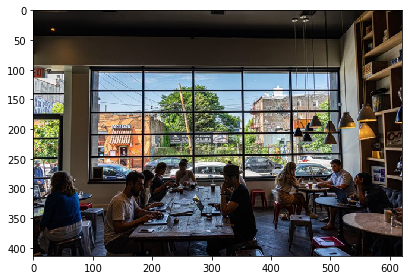

In [103]:
# Abridoo e exibindo uma imagem
from skimage import io 
img = io.imread(nome_imagem)
io.imshow(img)
io.show()

In [104]:
# Salvando como um novo arquivo
io.imsave('Imagem1_skimage.jpg', img)

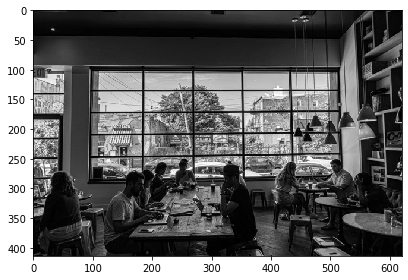

In [105]:
# Convertendo de RGB para GrayScale
from skimage import color, io 
gray_image = color.rgb2gray(img)
io.imshow(gray_image)
io.show()

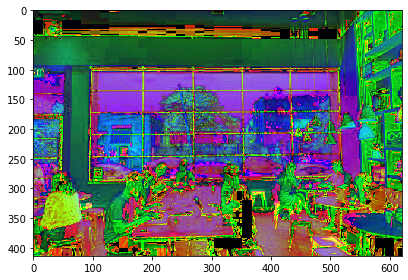

In [106]:
# Convertendo para HSV - Hue (matiz), Saturation (saturação) e Value (valor) - https://pt.wikipedia.org/wiki/HSV
hsv_image = color.rgb2hsv(img)
io.imshow(hsv_image)
io.show()

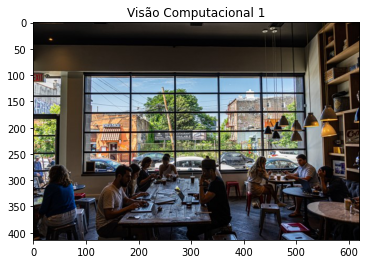

In [107]:
# Plotando com matplotlib informando o título
import matplotlib.pyplot as plt
plt.figure()
plt.title('Visão Computacional 1')
plt.imshow(img)
plt.show()

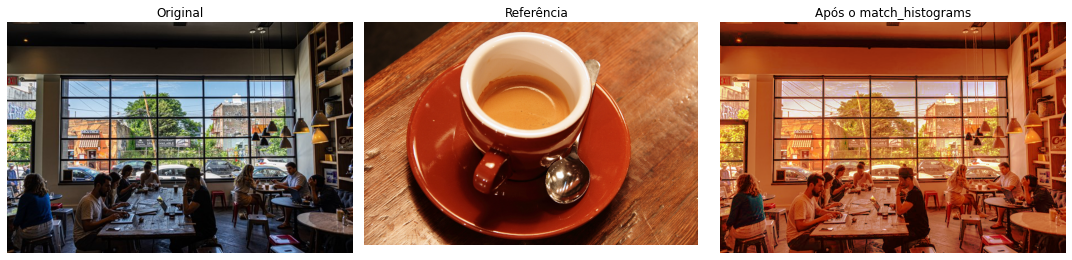

In [108]:
# Combinando imagens através da função match_histograms - https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.match_histograms
# Torna a o histograma igual a da imagem de referência
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import match_histograms

reference = data.coffee()
image = img

matched = match_histograms(image, reference, multichannel=True)

# Criando um plot com 3 colunas (para 3 gráficos)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 8),
                                    sharex=True, sharey=True)

# Removendo os eixos
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

# Adicionando as 3 imagens nas 3 colunas
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(reference)
ax2.set_title('Referência')
ax3.imshow(matched)
ax3.set_title('Após o match_histograms')

# Plotando tudo
plt.tight_layout()
plt.show()

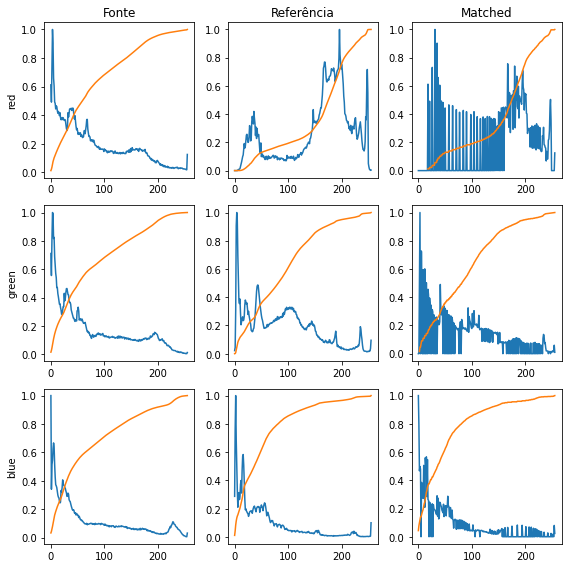

In [109]:
# Explicando o funcionamento
from skimage import exposure

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Fonte')
axes[0, 1].set_title('Referência')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

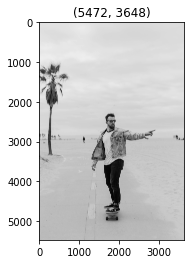

In [110]:
# Plotando outra imagem

import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(io.imread('skate.jpg'))
plt.figure()
plt.imshow(image, cmap='gray')
plt.title(image.shape)
plt.show()

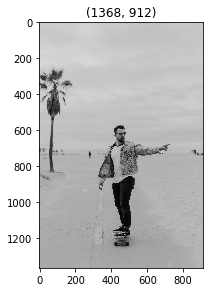

In [111]:
# Utilizando rescale()
# A operação de redimensionamento redimensiona uma imagem por um determinado fator de escala
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
io.imshow(image_rescaled, cmap='gray')
plt.title(image_rescaled.shape)
io.show()

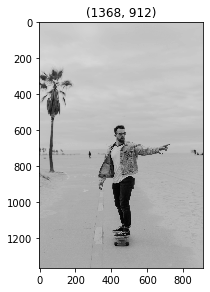

In [112]:
# Utilizando resize()
# O redimensionamento tem a mesma finalidade, mas permite especificar uma forma de imagem de saída em vez de um fator de escala
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
plt.figure()
io.imshow(image_resized, cmap='gray')
plt.title(image_resized.shape)
plt.show()

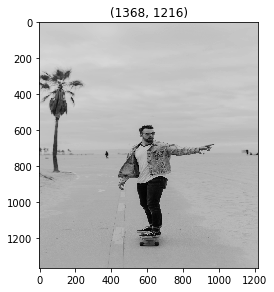

In [113]:
# Downscalle 
# A redução da escala serve ao propósito de reduzir a amostragem de uma imagem n-dimensional por fatores inteiros 
# usando a média local nos elementos de cada bloco dos fatores de tamanho dados como um parâmetro para a função
image_downscaled = downscale_local_mean(image, (4, 3))
plt.figure()
io.imshow(image_downscaled, cmap='gray')
plt.title(image_downscaled.shape)
plt.show()

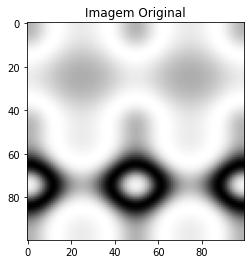

In [114]:
# Encontrando contornos com a função measure.find_contours - https://scikit-image.org/docs/0.8.0/api/skimage.measure.find_contours.html

import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Criando dados aleatórios
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Plotanfo a imagem original
plt.figure()
plt.title('Imagem Original')
plt.imshow(r, cmap=plt.cm.gray)
plt.show()

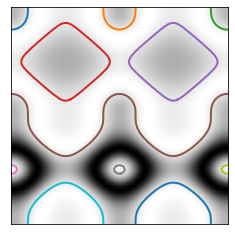

In [115]:
# Encontrando contornos para um valor constante 0.8
contours = measure.find_contours(r, 0.8)

# Plotando os contornos encontrados
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

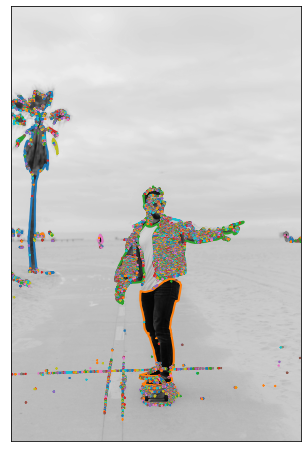

In [116]:
# Fazendo o mesmo para outra imagem

img2 = io.imread('skate.jpg')
gray_img2 = color.rgb2gray(img2)
contours = measure.find_contours(gray_img2, 0.5)

# Plotando os contornos encontrados
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(gray_img2, cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

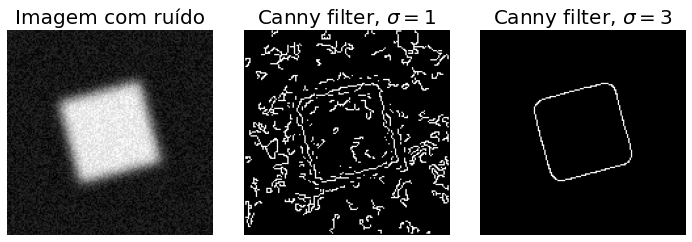

In [117]:
# Detecção de borda com a função feature.canny

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Criando uma imagem com ruído
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1
im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Aplicando o filtro Canny
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# Mostrando os resultados
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5),
                                    sharex=True, sharey=True)

# Removendo os eixos
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(im, cmap=plt.cm.gray)
ax1.set_title('Imagem com ruído', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()
plt.show()

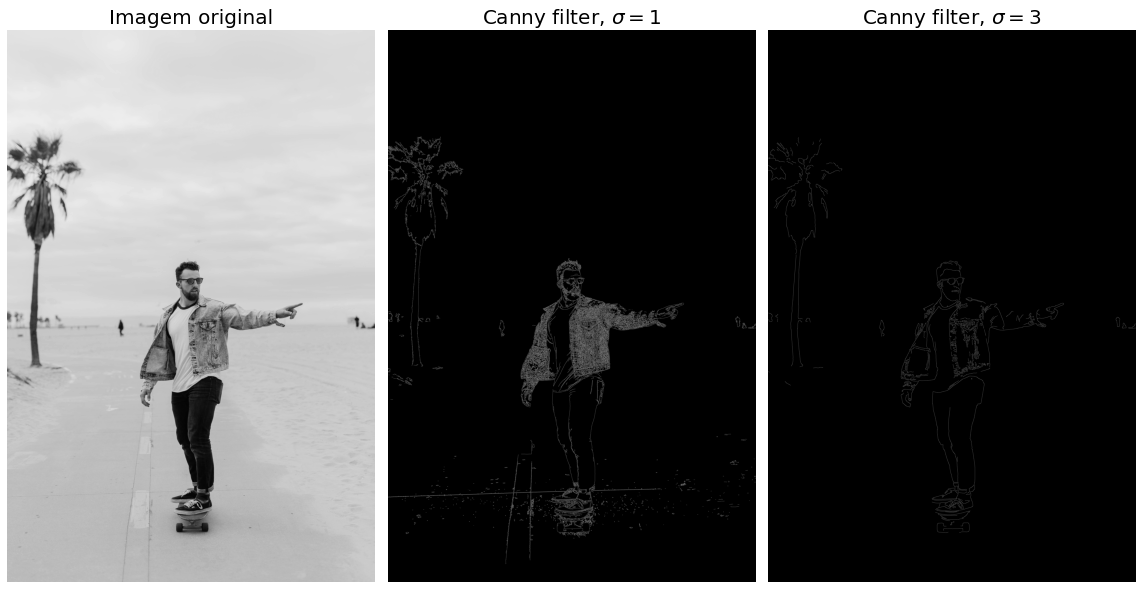

In [118]:
# Detecção de borda para outra imagem

img2 = io.imread('skate.jpg')
gray_img2 = color.rgb2gray(img2)
edges1 = feature.canny(gray_img2)
edges2 = feature.canny(gray_img2, sigma=3)

# Mostrando os resultados
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8),
                                    sharex=True, sharey=True)

# Removendo os eixos
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(gray_img2, cmap=plt.cm.gray)
ax1.set_title('Imagem original', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()
plt.show()

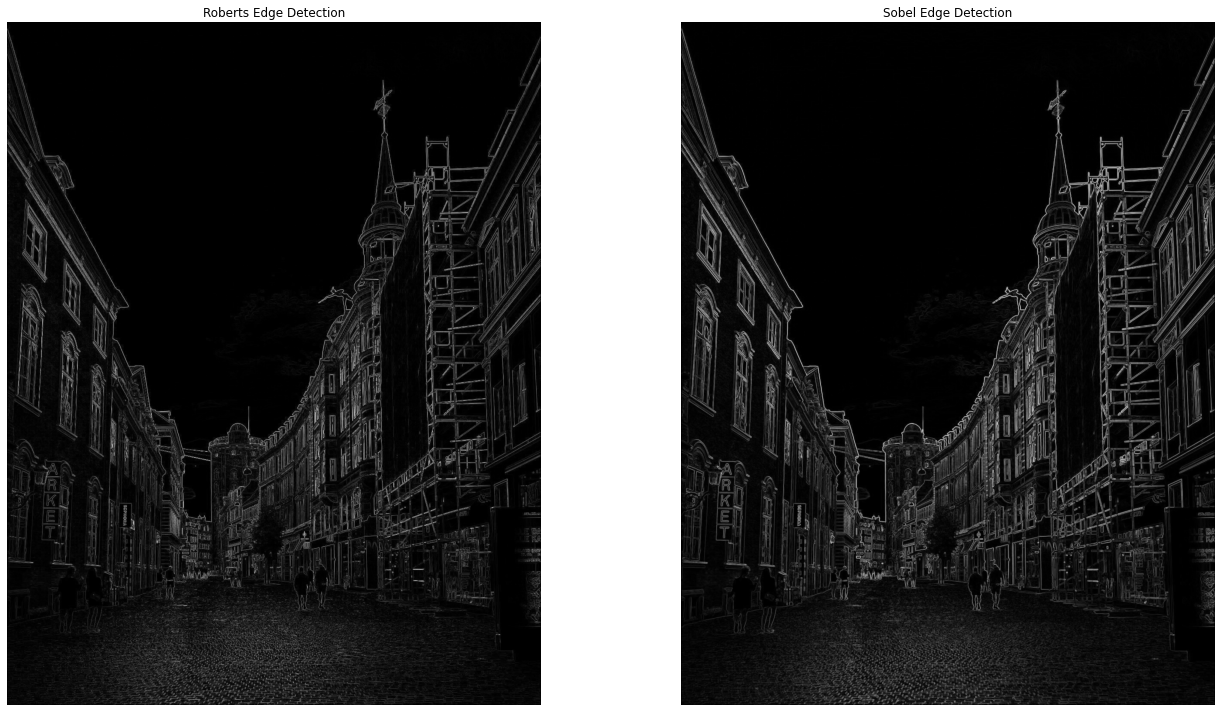

In [119]:
# Detecção de borda com roberts e sobel

import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


image = color.rgb2gray(io.imread('street.jpg'))
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(20, 10))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

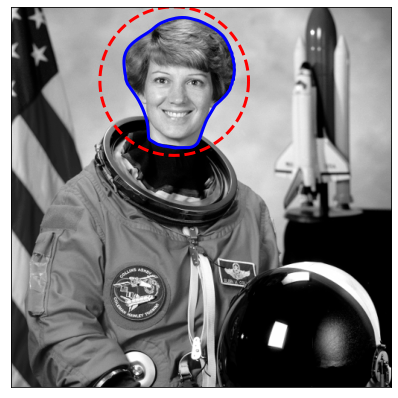

In [120]:
# Encontrando contornos com segmentation.active_contour

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Carregando imagem de uma astronauta
img_ast = data.astronaut()
img_ast = rgb2gray(img_ast)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_ast, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_ast, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_ast.shape[1], img_ast.shape[0], 0])

plt.show()

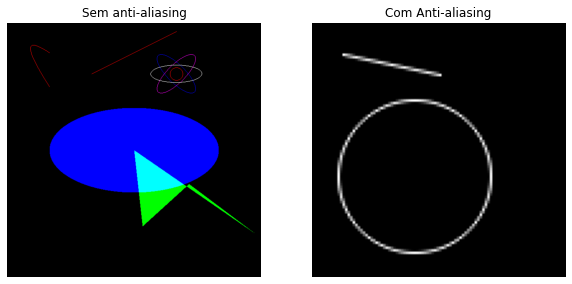

In [121]:
# Criando figuras em uma nova imagem
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import (line, polygon, 
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

img_new = np.zeros((600, 600, 3), dtype=np.double)

# Desenhando linha
rr, cc = line(120, 200, 20, 400)
img_new[rr, cc, 0] = 255

# Polígono
poly = np.array((
    (300, 300),
    (480, 320),
    (380, 430),
    (500, 590),
    (300, 300),
))
rr, cc = polygon(poly[:, 0], poly[:, 1], img_new.shape)
img_new[rr, cc, 1] = 1

# Elipse
rr, cc = ellipse(300, 300, 100, 200, img_new.shape)
img_new[rr, cc, 2] = 1

# Círculo
rr, cc = circle_perimeter(120, 400, 15)
img_new[rr, cc, :] = (1, 0, 0)

# Curva
rr, cc = bezier_curve(70, 100, 10, 10, 150, 100, 1)
img_new[rr, cc, :] = (1, 0, 0)

# Elipses
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 4.)
img_new[rr, cc, :] = (1, 0, 1)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=-math.pi / 4.)
img_new[rr, cc, :] = (0, 0, 1)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 2.)
img_new[rr, cc, :] = (1, 1, 1)

ax1.imshow(img_new)
ax1.set_title('Sem anti-aliasing')
ax1.axis('off')

# Criando com funções anti-aliasing
from skimage.draw import line_aa, circle_perimeter_aa

img_new = np.zeros((100, 100), dtype=np.double)

# anti-aliased line
rr, cc, val = line_aa(12, 12, 20, 50)
img_new[rr, cc] = val

# anti-aliased circle
rr, cc, val = circle_perimeter_aa(60, 40, 30)
img_new[rr, cc] = val


ax2.imshow(img_new, cmap=plt.cm.gray)
ax2.set_title('Com Anti-aliasing')
ax2.axis('off')

plt.show()

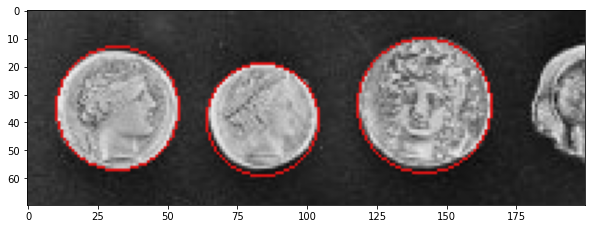

In [122]:
# Detecção de círculos e elipses

import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Carregando imagem
image = img_as_ubyte(data.coins()[160:230, 70:270])

# Detectando bordas
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Detectando círculos
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Selecionando os 3 círculos mais relevantes
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Imprimindo
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

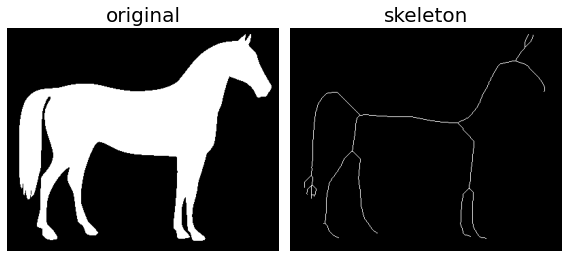

In [123]:
# Detecção do Esqueleto com skeletonize() do pacote morfologia

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()


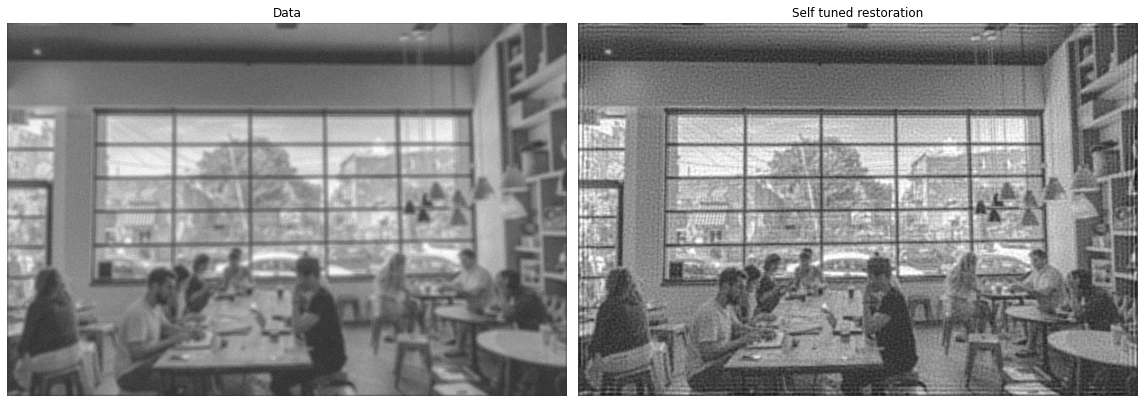

In [124]:
# Restaurando uma imagem com unsupervised_wiener

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

img2 = color.rgb2gray(img)
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
img2 = conv2(img2, psf, 'same')
img2 += 0.1 * img2.std() * np.random.standard_normal(img2.shape)

deconvolved, _ = restoration.unsupervised_wiener(img2, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(img2, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

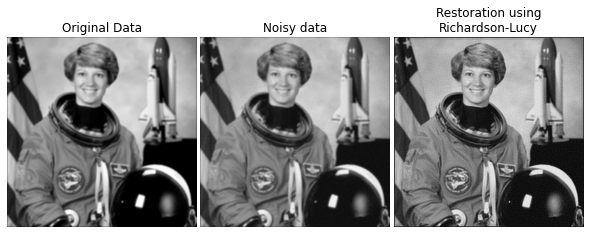

In [125]:
# Restaurando com richardson_lucy

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')

# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

Estimated Gaussian noise standard deviation = 0.14744535167319342


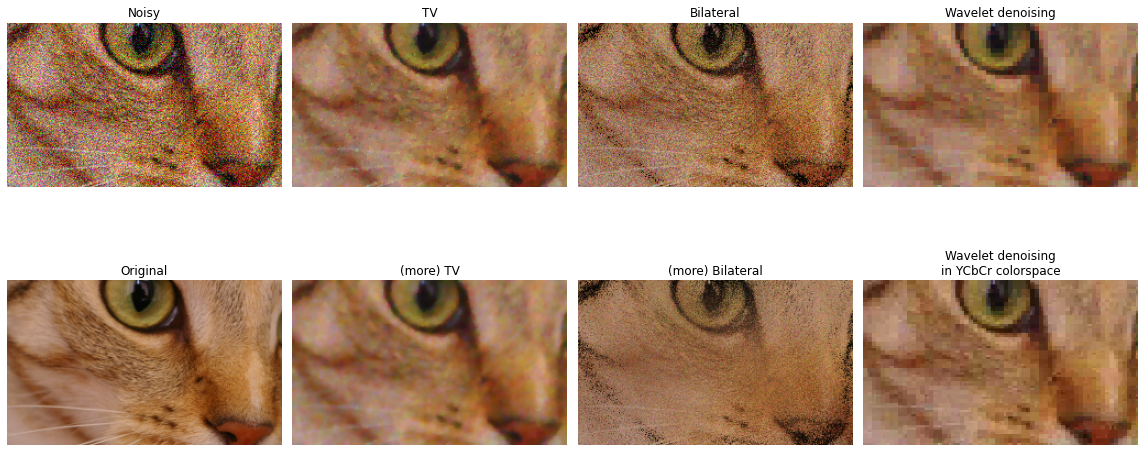

In [126]:
# Removendo ruído com vários algoritmos

import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

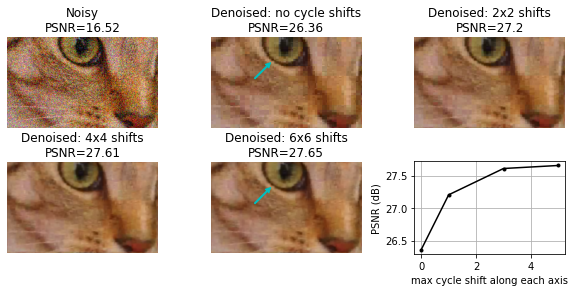

In [127]:
# Removendo ruído (https://scikit-image.org/docs/stable/auto_examples/filters/plot_cycle_spinning.html#sphx-glr-auto-examples-filters-plot-cycle-spinning-py)

import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, cycle_spin
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 4),
                       sharex=False, sharey=False)
ax = ax.ravel()

psnr_noisy = peak_signal_noise_ratio(original, noisy)
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))

# Repeat denosing with different amounts of cycle spinning.  e.g.
# max_shift = 0 -> no cycle spinning
# max_shift = 1 -> shifts of (0, 1) along each axis
# max_shift = 3 -> shifts of (0, 1, 2, 3) along each axis
# etc...

denoise_kwargs = dict(multichannel=True, convert2ycbcr=True, wavelet='db1',
                      rescale_sigma=True)

all_psnr = []
max_shifts = [0, 1, 3, 5]
for n, s in enumerate(max_shifts):
    im_bayescs = cycle_spin(noisy, func=denoise_wavelet, max_shifts=s,
                            func_kw=denoise_kwargs, multichannel=True)
    ax[n+1].imshow(im_bayescs)
    ax[n+1].axis('off')
    psnr = peak_signal_noise_ratio(original, im_bayescs)
    if s == 0:
        ax[n+1].set_title(
            "Denoised: no cycle shifts\nPSNR={:0.4g}".format(psnr))
    else:
        ax[n+1].set_title(
            "Denoised: {0}x{0} shifts\nPSNR={1:0.4g}".format(s+1, psnr))
    all_psnr.append(psnr)

# plot PSNR as a function of the degree of cycle shifting
ax[5].plot(max_shifts, all_psnr, 'k.-')
ax[5].set_ylabel('PSNR (dB)')
ax[5].set_xlabel('max cycle shift along each axis')
ax[5].grid(True)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

# Annotate with a cyan arrow on the 6x6 case vs. no cycle shift case to
# illustrate a region with reduced block-like artifact with cycle shifting
arrowprops = dict(arrowstyle="simple,tail_width=0.1,head_width=0.5",
                  connectionstyle="arc3",
                  color='c')
for i in [1, 4]:
    ax[i].annotate("", xy=(101, 39), xycoords='data',
                   xytext=(70, 70), textcoords='data',
                   arrowprops=arrowprops)

plt.show()

estimated noise standard deviation = 0.07815040321190415
PSNR (noisy) = 22.23
PSNR (slow) = 29.55
PSNR (slow, using sigma) = 29.93
PSNR (fast) = 28.59
PSNR (fast, using sigma) = 29.45


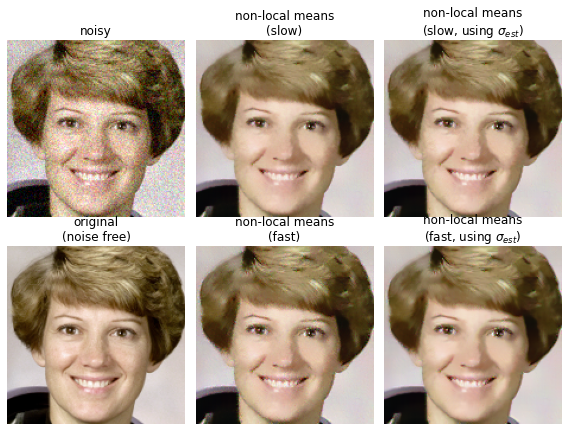

In [128]:
# Removendo ruído (https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html#sphx-glr-auto-examples-filters-plot-nonlocal-means-py)

import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise


astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title('non-local means\n(slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title('non-local means\n(fast, using $\\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)

print(f"PSNR (noisy) = {psnr_noisy:0.2f}")
print(f"PSNR (slow) = {psnr:0.2f}")
print(f"PSNR (slow, using sigma) = {psnr2:0.2f}")
print(f"PSNR (fast) = {psnr_fast:0.2f}")
print(f"PSNR (fast, using sigma) = {psnr2_fast:0.2f}")

plt.show()

# Exercício 2.1

- a) Busque uma imagem da Internet que esteja precisando de um filtro
- b) Carregue a imagem com o pacote skimage
- c) Faça a rotação se for necessário
- d) Recorte uma área de interesse
- e) Aplique filtros para atingir o objetivo pretendido (dizer qual é. Ex: identificar bordas, remover ruído)
- f) Redimensione para que tenha a largura de 400 pixels, mantendo a proporção
- g) Salve a imagem resultante com o nome Imagem_ex_2_1.jpg

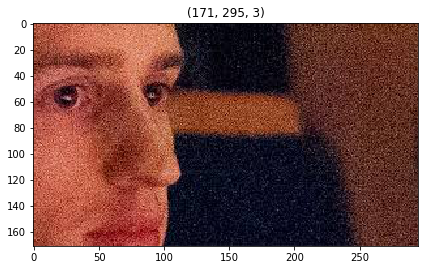

In [129]:
img_ruido = io.imread('imagem_com_ruido.jpeg')
io.imshow(img_ruido)
plt.title(img_ruido.shape)
io.show()

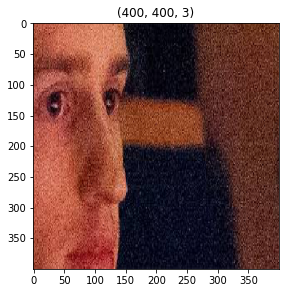

In [130]:
resized = resize(img_ruido, (400, 400), anti_aliasing=True)
plt.figure()
io.imshow(resized)
plt.title(resized.shape)
plt.show()

#### Remoção de ruídos

estimated noise standard deviation = 0.05801235077534104


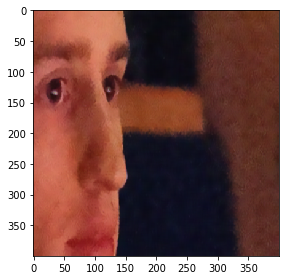

In [131]:
original = img_as_float(resized)
sigma = 0.06
noisy = random_noise(original, var=sigma**2)

sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=5, patch_distance=6, multichannel=True)
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, sigma=sigma_est, fast_mode=True, **patch_kw)

plt.figure()
io.imshow(denoise)
plt.show()

In [132]:
io.imsave('Imagem_ex_2_1.jpg', denoise)
%ls -la

total 3025
-rw------- 1 root root   60576 Feb  6  2018 BebasNeue-Regular.ttf
-rw------- 1 root root   72153 Oct 10 19:09 exercicio_3.jpg
-rw------- 1 root root   56289 Oct 10 19:40 Imagem1_cinza.jpg
-rw------- 1 root root    5916 Oct 10 19:40 Imagem1_cortada.jpg
-rw------- 1 root root   93503 Sep 29 02:37 Imagem1.jpg
-rw------- 1 root root   56289 Oct 11 13:05 Imagem1_skimage.jpg
-rw------- 1 root root   13967 Sep 29 03:45 Imagem2.jpg
-rw------- 1 root root   12656 Oct 11 12:11 imagem_com_ruido.jpeg
-rw------- 1 root root   14241 Oct 10 19:40 Imagem_ex_1_1.jpg
-rw------- 1 root root   44789 Oct 10 19:40 Imagem_ex_1_2.jpg
-rw------- 1 root root   18060 Oct 10 19:43 Imagem_ex_1_3.jpg
-rw------- 1 root root   12634 Oct 11 13:06 Imagem_ex_2_1.jpg
-rw------- 1 root root   43632 May 15  2012 Pacifico.ttf
-rw------- 1 root root  229239 Oct  6 03:11 robot.jpg
-rw------- 1 root root  753291 Oct  6 03:13 skate.jpg
-rw------- 1 root root 1606428 Oct  6 19:19 street.jpg


FIM